In [2]:

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [3]:

CLIENT_ID = 'ILBG22G2SM2TP52J13KBXZ52IZY4GDCH1FCUC1NLSSXW4RH0' # your Foursquare ID
CLIENT_SECRET = 'EQ5PN1BIDZMBMJ5TFY0XGLB2G0RHX0X4INTHCEWA5EJCE3Z3' # your Foursquare Secret
VERSION = '20300330'
LIMIT = 99
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ILBG22G2SM2TP52J13KBXZ52IZY4GDCH1FCUC1NLSSXW4RH0
CLIENT_SECRET:EQ5PN1BIDZMBMJ5TFY0XGLB2G0RHX0X4INTHCEWA5EJCE3Z3


In [4]:

address = '102 North End Ave, New York, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


40.7149555 -74.0153365


In [5]:
search_query = 'coffee'
radius = 5000
print(search_query + ' .... OK!')

coffee .... OK!


In [6]:

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=ILBG22G2SM2TP52J13KBXZ52IZY4GDCH1FCUC1NLSSXW4RH0&client_secret=EQ5PN1BIDZMBMJ5TFY0XGLB2G0RHX0X4INTHCEWA5EJCE3Z3&ll=40.7149555,-74.0153365&v=20300330&query=coffee&radius=5000&limit=99'

In [7]:

results = requests.get(url).json()
# results

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referralId                           99 non-null     object 
 1   reasons.count                        99 non-null     int64  
 2   reasons.items                        99 non-null     object 
 3   venue.id                             99 non-null     object 
 4   venue.name                           99 non-null     object 
 5   venue.location.address               97 non-null     object 
 6   venue.location.crossStreet           77 non-null     object 
 7   venue.location.lat                   99 non-null     float64
 8   venue.location.lng                   99 non-null     float64
 9   venue.location.labeledLatLngs        99 non-null     object 
 10  venue.location.distance              99 non-null     int64  
 11  venue.location.postalCode         

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [9]:

df=pd.DataFrame()
df['venue_ID']=dataframe['venue.id']
df['name']=dataframe['venue.name']
df['lat']=dataframe['venue.location.lat']
df['lng']=dataframe['venue.location.lng']
df.head()

,venue_ID,name,lat,lng
0,5171b5cc011cef9833bbb787,Mulberry & Vine,40.715177,-74.010227
1,49ccd495f964a52091591fe3,Kaffe 1668,40.715045,-74.011509
2,4ea0afbf9adf1e334e4cc0e6,Laughing Man Coffee & Tea,40.717394,-74.010103
3,56093809498e5344ab8835a6,The Wooly Daily,40.712137,-74.008395
4,4ce41f161594236ac316fb49,Starbucks Reserve,40.714170,-74.015434


In [10]:
# Show the cafes on the map
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=13)

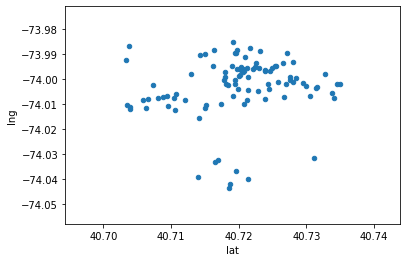

In [11]:

# Cluster these Cafes based on their geographic locations

from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library


%matplotlib inline

df.plot(x='lat',y='lng',kind='scatter')

In [12]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
df_array=np.array(df[['lat','lng']])
k_means.fit(df_array)
k_labels=pd.DataFrame(k_means.labels_)
k_labels.info()
df['cluster']=k_labels
df.groupby('cluster').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       99 non-null     int32
dtypes: int32(1)
memory usage: 524.0 bytes


,venue_ID,name,lat,lng
cluster,,,,
0,26,26,26,26
1,46,46,46,46
2,8,8,8,8
3,19,19,19,19


In [13]:
# add markers to map

for lat, lng, name,venue_ID,cluster in zip(df['lat'], df['lng'], df['name'],df['venue_ID'],df['cluster']):
    
    if cluster == 0:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if cluster == 1:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if cluster == 2:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if cluster == 3:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    
map_newyork

In [14]:

# Generate the recommended location for the four cluster using the mean of the locations

center_location=df.groupby('cluster').mean()
center_location

,lat,lng
cluster,,
0,40.727399,-74.003680
1,40.719996,-73.994724
2,40.719611,-74.037251
3,40.709433,-74.009337


In [15]:

# color_list=['blue','red','green','purple']
# Add recommended location on the map
i=0
for lat, lng in zip(center_location['lat'],center_location['lng']):
    folium.Marker([lat,lng], popup='Recommend for Group '+ str(i)).add_to(map_newyork)
    i=i+1
map_newyork